# Walmart Weekly Sales Frecasting

<b>Importing Libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn as sns


from datetime import datetime

import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

<b>Loading the datasets

In [2]:
# Importing the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')

<b>Explore datasets

In [3]:
print("Structure of train: ",train.shape,"\n")
print("Structure of features: ",features.shape,"\n")
print("Structure of stores: ",stores.shape,"\n")
print("Structure of test: ",test.shape,"\n")

Structure of train:  (421570, 5) 

Structure of features:  (8190, 12) 

Structure of stores:  (45, 3) 

Structure of test:  (115064, 4) 



In [4]:
# Make datetypes constant for all datasets
features['Date'] = pd.to_datetime(features['Date'], format="%Y-%m-%d")
train['Date'] = pd.to_datetime(train['Date'], format="%Y-%m-%d")
test['Date'] = pd.to_datetime(test['Date'], format="%Y-%m-%d")

<b>Joining & Merging datasets

In [5]:
#Joining stores table with train &test Tables
combined_train = pd.merge(train,stores, how="left", on="Store")
combined_test = pd.merge(test,stores, how="left", on="Store")

In [6]:
print(combined_train.head(),"\n", combined_train.shape,"\n")
print(combined_test.head(),"\n", combined_test.shape,"\n")

   Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size
0      1     1 2010-02-05      24924.50      False    A  151315
1      1     1 2010-02-12      46039.49       True    A  151315
2      1     1 2010-02-19      41595.55      False    A  151315
3      1     1 2010-02-26      19403.54      False    A  151315
4      1     1 2010-03-05      21827.90      False    A  151315 
 (421570, 7) 

   Store  Dept       Date  IsHoliday Type    Size
0      1     1 2012-11-02      False    A  151315
1      1     1 2012-11-09      False    A  151315
2      1     1 2012-11-16      False    A  151315
3      1     1 2012-11-23       True    A  151315
4      1     1 2012-11-30      False    A  151315 
 (115064, 6) 



In [7]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
#Joining features table with abobe datframes
train_data = pd.merge(combined_train,features, how = "inner", on=["Store","Date","IsHoliday"])
test_data = pd.merge(combined_test,features, how = "inner", on=["Store","Date","IsHoliday"])

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 51.9+ MB


<b>Separating numeric & Categorical variables in train_data

In [10]:
dict(train_data.dtypes)

{'Store': dtype('int64'),
 'Dept': dtype('int64'),
 'Date': dtype('<M8[ns]'),
 'Weekly_Sales': dtype('float64'),
 'IsHoliday': dtype('bool'),
 'Type': dtype('O'),
 'Size': dtype('int64'),
 'Temperature': dtype('float64'),
 'Fuel_Price': dtype('float64'),
 'MarkDown1': dtype('float64'),
 'MarkDown2': dtype('float64'),
 'MarkDown3': dtype('float64'),
 'MarkDown4': dtype('float64'),
 'MarkDown5': dtype('float64'),
 'CPI': dtype('float64'),
 'Unemployment': dtype('float64')}

In [11]:
numeric_var_names=[key for key in dict(train_data.dtypes) if dict(train_data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train_data.dtypes) if dict(train_data.dtypes)[key] in ['object', 'O']]

In [12]:
#Separating numeric and Categorical variables of test_data
numeric_var_test=[key for key in dict(test_data.dtypes) if dict(test_data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_test=[key for key in dict(test_data.dtypes) if dict(test_data.dtypes)[key] in ['object', 'O']]

In [13]:
numeric_var_names

['Store',
 'Dept',
 'Weekly_Sales',
 'Size',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [14]:
cat_var_names

['Type']

In [15]:
df_num=train_data[numeric_var_names]
df_num.head(5)

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,24924.50,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,50605.27,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,13740.12,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,39954.04,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,32229.38,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [16]:
#For test_data numeric variables frame
df_test_num=test_data[numeric_var_test]
#df_test_num.head(5)

In [17]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [18]:
df_num.apply(var_summary)

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
N,4.215700e+05,4.215700e+05,4.215700e+05,4.215700e+05,4.215700e+05,4.215700e+05,1.506810e+05,1.112480e+05,1.370910e+05,1.349670e+05,1.514320e+05,4.215700e+05,4.215700e+05
NMISS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.708890e+05,3.103220e+05,2.844790e+05,2.866030e+05,2.701380e+05,0.000000e+00,0.000000e+00
SUM,9.359084e+06,1.865882e+07,6.737219e+09,5.764039e+10,2.533217e+07,1.416908e+06,1.091898e+09,3.709708e+08,1.973317e+08,4.566161e+08,7.009750e+08,7.217360e+07,3.355819e+06
MEAN,2.220055e+01,4.426032e+01,1.598126e+04,1.367279e+05,6.009006e+01,3.361027e+00,7.246420e+03,3.334629e+03,1.439421e+03,3.383168e+03,4.628975e+03,1.712019e+02,7.960289e+00
MEDIAN,2.200000e+01,3.700000e+01,7.612030e+03,1.401670e+05,6.209000e+01,3.452000e+00,5.347450e+03,1.920000e+02,2.460000e+01,1.481310e+03,3.359450e+03,1.823188e+02,7.866000e+00
STD,1.278530e+01,3.049205e+01,2.271118e+04,6.098058e+04,1.844793e+01,4.585145e-01,8.291221e+03,9.475357e+03,9.623078e+03,6.292384e+03,5.962887e+03,3.915928e+01,1.863296e+00
VAR,1.634638e+02,9.297654e+02,5.157979e+08,3.718632e+09,3.403262e+02,2.102356e-01,6.874435e+07,8.978240e+07,9.260364e+07,3.959410e+07,3.555603e+07,1.533449e+03,3.471872e+00
CV,5.759001e-01,6.889253e-01,1.421114e+00,4.459995e-01,3.070047e-01,1.364210e-01,1.144182e+00,2.841503e+00,6.685380e+00,1.859909e+00,1.288166e+00,2.287315e-01,2.340739e-01
MIN,1.000000e+00,1.000000e+00,-4.988940e+03,3.487500e+04,-2.060000e+00,2.472000e+00,2.700000e-01,-2.657600e+02,-2.910000e+01,2.200000e-01,1.351600e+02,1.260640e+02,3.879000e+00
P1,1.000000e+00,1.000000e+00,5.000000e+00,3.487500e+04,1.830000e+01,2.565000e+00,1.776000e+01,-9.900000e-01,6.000000e-02,3.970000e+00,3.519700e+02,1.261119e+02,4.156000e+00


In [19]:
Summary_n=df_num.apply(var_summary).T

In [20]:
Summary_n

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,421570.0,0.0,9.359084e+06,22.200546,22.00000,12.785297,1.634638e+02,0.575900,1.000,1.000000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,421570.0,0.0,1.865882e+07,44.260317,37.00000,30.492054,9.297654e+02,0.688925,1.000,1.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,421570.0,0.0,6.737219e+09,15981.258123,7612.03000,22711.183519,5.157979e+08,1.421114,-4988.940,5.000000,59.974500,291.097000,2079.650000,7612.03000,20205.852500,42845.673000,61201.951000,106479.586000,693099.360000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,0.446000,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,421570.0,0.0,2.533217e+07,60.090059,62.09000,18.447931,3.403262e+02,0.307005,-2.060,18.300000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,0.136421,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,150681.0,270889.0,1.091898e+09,7246.420196,5347.45000,8291.221345,6.874435e+07,1.144182,0.270,17.760000,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000,41524.030000,88646.760000
MarkDown2,111248.0,310322.0,3.709708e+08,3334.628621,192.00000,9475.357325,8.978240e+07,2.841503,-265.760,-0.990000,1.950000,6.980000,41.600000,192.00000,1926.940000,8549.740000,16497.470000,50366.600000,104519.540000
MarkDown3,137091.0,284479.0,1.973317e+08,1439.421384,24.60000,9623.078290,9.260364e+07,6.685380,-29.100,0.060000,0.650000,1.650000,5.080000,24.60000,103.990000,400.090000,1059.900000,63143.290000,141630.610000
MarkDown4,134967.0,286603.0,4.566161e+08,3383.168256,1481.31000,6292.384031,3.959410e+07,1.859909,0.220,3.970000,28.760000,108.710000,504.220000,1481.31000,3595.040000,7871.420000,12645.960000,35785.260000,67474.850000


<b>Outlier Treatment

In [21]:
#Handling Outliers 
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

df_num=df_num.apply(outlier_capping)

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


In [22]:
df_num.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,421570.0,0.0,9.363367e+06,22.210705,22.00000,12.562867,1.578256e+02,0.565622,3.000000,3.000000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000,43.000000,43.000000
Dept,421570.0,0.0,1.865907e+07,44.260896,37.00000,30.211145,9.127133e+02,0.682570,4.000000,4.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,95.000000,95.000000
Weekly_Sales,421570.0,0.0,6.137489e+09,14558.647935,7612.03000,17148.103560,2.940575e+08,1.177864,59.974500,59.974500,59.976975,291.097000,2079.650000,7612.03000,20205.852500,42845.673000,61201.896550,61201.951000,61201.951000
Size,421570.0,0.0,5.755292e+10,136520.446087,140167.00000,60282.717089,3.634006e+09,0.441565,39690.000000,39690.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,206302.000000,206302.000000
Temperature,421570.0,0.0,2.537925e+07,60.201741,62.09000,17.569629,3.086919e+02,0.291846,27.310000,27.310000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,87.270000,87.270000
Fuel_Price,421570.0,0.0,1.415548e+06,3.357799,3.45200,0.443941,1.970832e-01,0.132212,2.653000,2.653000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.029000,4.029000
MarkDown1,150681.0,270889.0,9.977030e+08,6621.292975,5347.45000,5780.338355,3.341231e+07,0.872992,149.190000,149.190000,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000,21801.350000,21801.350000
MarkDown2,111248.0,310322.0,2.550976e+08,2293.053419,192.00000,4400.856941,1.936754e+07,1.919213,1.950000,1.950000,1.950000,6.980000,41.600000,192.00000,1926.940000,8549.740000,16497.470000,16497.470000,16497.470000
MarkDown3,137091.0,284479.0,1.835634e+07,133.898931,24.60000,265.588011,7.053699e+04,1.983496,0.650000,0.650000,0.650000,1.650000,5.080000,24.60000,103.990000,400.090000,1059.900000,1059.900000,1059.900000
MarkDown4,134967.0,286603.0,3.712460e+08,2750.643014,1481.31000,3329.178000,1.108343e+07,1.210327,28.760000,28.760000,28.760000,108.710000,504.220000,1481.31000,3595.040000,7871.420000,12645.960000,12645.960000,12645.960000


<b>Handling Missing values of train data

In [23]:
df_num.isna().sum()

Store                0
Dept                 0
Weekly_Sales         0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [24]:
#Filling Missings by 0
df_num.fillna(0, inplace=True)

<b>Handling Categorical Variables of train data

In [25]:
df_cat = train_data[cat_var_names]
df_cat.head(5)

,Type
0,A
1,A
2,A
3,A
4,A


In [26]:
# Create dummies
type_dummies = pd.get_dummies(df_cat['Type'])

<b>Handling Categorical variabled of test_data

In [27]:

df_cat_test = test_data[cat_var_test]
df_cat_test.head(5)

,Type
0,A
1,A
2,A
3,A
4,A


In [28]:
# Create dummies of test_data
type_dummie = pd.get_dummies(df_cat_test['Type'])

<b>Final test and train data:

In [29]:
df = pd.concat([df_num,type_dummies],axis=1)

In [30]:
df.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,A,B,C
0,3,4,24924.50,151315,42.31,2.653,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0
1,3,4,50605.27,151315,42.31,2.653,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0
2,3,4,13740.12,151315,42.31,2.653,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0
3,3,4,39954.04,151315,42.31,2.653,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0
4,3,5,32229.38,151315,42.31,2.653,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0,0


In [31]:
df_test=  pd.concat([df_test_num,type_dummie],axis=1)

In [32]:
df_test.head()

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,A,B,C
0,1,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,0,0
1,1,2,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,0,0
2,1,3,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,0,0
3,1,4,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,0,0
4,1,5,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,0,0


<b>Handling Missing values of test data (df_test)

In [33]:
df_test.isna().sum()

Store               0
Dept                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
A                   0
B                   0
C                   0
dtype: int64

In [34]:
df_test['CPI']= df_test['CPI'].fillna(df_test['CPI'].mean())
df_test['Unemployment']= df_test['Unemployment'].fillna(df_test['Unemployment'].mean())

In [35]:
#Filling Markdowns Missings by 0
df_test.fillna(0, inplace=True)

In [36]:
print (df.isna().sum())

print (df_test.isna().sum())

Store           0
Dept            0
Weekly_Sales    0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
A               0
B               0
C               0
dtype: int64
Store           0
Dept            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
A               0
B               0
C               0
dtype: int64


<b>Adding Date column to final dataframes

In [51]:
df['Date']= train_data['Date']
df_test['Date']= test_data['Date']

<b>Extracting Months, Year, Quarter from the Date column

In [52]:
#Extracting from train data
from datetime import datetime
from datetime import timedelta
df['Month'] =df['Date'].dt.month 
df['Year'] =df['Date'].dt.year
df['Quarter'] =df['Date'].dt.quarter

In [53]:
#Extracting from test data
from datetime import datetime
from datetime import timedelta
df_test['Month'] =df_test['Date'].dt.month 
df_test['Year'] =df_test['Date'].dt.year
df_test['Quarter'] =df_test['Date'].dt.quarter

In [54]:
df['IsHoliday']= train_data['IsHoliday']
df_test['IsHoliday']= test_data['IsHoliday']

In [55]:
#Encode the IsHoliday colum into 0 &1
df['IsHoliday']= np.where((df.IsHoliday==True),1,0)
df_test['IsHoliday']= np.where((df_test.IsHoliday==True),1,0)

In [56]:
df.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,C,Date,Month,Year,Quarter,IsHoliday,Super_Bowl,Labour_Day,Thanksgiving,Christmas
0,3,4,24924.50,151315,42.31,2.653,0.0,0.0,0.0,0.0,...,0,2010-02-05,2,2010,1,0,0,0,0,0
1,3,4,50605.27,151315,42.31,2.653,0.0,0.0,0.0,0.0,...,0,2010-02-05,2,2010,1,0,0,0,0,0
2,3,4,13740.12,151315,42.31,2.653,0.0,0.0,0.0,0.0,...,0,2010-02-05,2,2010,1,0,0,0,0,0
3,3,4,39954.04,151315,42.31,2.653,0.0,0.0,0.0,0.0,...,0,2010-02-05,2,2010,1,0,0,0,0,0
4,3,5,32229.38,151315,42.31,2.653,0.0,0.0,0.0,0.0,...,0,2010-02-05,2,2010,1,0,0,0,0,0


<b>Creating Special Holidays:

In [57]:
#For train data
df['Super_Bowl'] = np.where((df['Date']==datetime(2010, 2, 12)) | (df['Date']==datetime(2011, 2, 11)) | (df['Date']==datetime(2012, 2, 10)) | (df['Date']==datetime(2013, 2, 8)),1,0)
df['Labour_Day'] = np.where((df['Date']==datetime(2010, 9, 10)) | (df['Date']==datetime(2011, 9, 9)) | (df['Date']==datetime(2012, 9, 7)) | (df['Date']==datetime(2013, 9, 6)),1,0)
df['Thanksgiving'] = np.where((df['Date']==datetime(2010, 11, 26)) | (df['Date']==datetime(2011, 11, 25)) | (df['Date']==datetime(2012, 11, 23)) | (df['Date']==datetime(2013, 11, 29)),1,0)
df['Christmas'] = np.where((df['Date']==datetime(2010, 12, 31)) | (df['Date']==datetime(2011, 12, 30)) | (df['Date']==datetime(2012, 12, 28)) | (df['Date']==datetime(2013, 12, 27)),1,0)
#For test data
df_test['Super_Bowl'] = np.where((df_test['Date']==datetime(2010, 2, 12)) | (df_test['Date']==datetime(2011, 2, 11)) | (df_test['Date']==datetime(2012, 2, 10)) | (df_test['Date']==datetime(2013, 2, 8)),1,0)
df_test['Labour_Day'] = np.where((df_test['Date']==datetime(2010, 9, 10)) | (df_test['Date']==datetime(2011, 9, 9)) | (df_test['Date']==datetime(2012, 9, 7)) | (df_test['Date']==datetime(2013, 9, 6)),1,0)
df_test['Thanksgiving'] = np.where((df_test['Date']==datetime(2010, 11, 26)) | (df_test['Date']==datetime(2011, 11, 25)) | (df_test['Date']==datetime(2012, 11, 23)) | (df_test['Date']==datetime(2013, 11, 29)),1,0)
df_test['Christmas'] = np.where((df_test['Date']==datetime(2010, 12, 31)) | (df_test['Date']==datetime(2011, 12, 30)) | (df_test['Date']==datetime(2012, 12, 28)) | (df_test['Date']==datetime(2013, 12, 27)),1,0)

<b>As we already have IsHoliday variable that contains Holidays ,so merge all the Special Holidays in IsHolidays variable and will remove Special Holidays variables

In [58]:
# Altering the isHoliday value depending on these new holidays...
df['IsHoliday']=df['IsHoliday']|df['Super_Bowl']|df['Labour_Day']|df['Thanksgiving']|df['Christmas']
df_test['IsHoliday']=df_test['IsHoliday']|df_test['Super_Bowl']|df_test['Labour_Day']|df_test['Thanksgiving']|df_test['Christmas']

In [59]:
print (df['Christmas'].value_counts())
print (df['Super_Bowl'].value_counts())
print (df['Thanksgiving'].value_counts())
print (df['Labour_Day'].value_counts())

0    415624
1      5946
Name: Christmas, dtype: int64
0    412675
1      8895
Name: Super_Bowl, dtype: int64
0    415611
1      5959
Name: Thanksgiving, dtype: int64
0    412709
1      8861
Name: Labour_Day, dtype: int64


In [60]:
# Now remove these holidays extra variables, as we have updated IsHoliday already
dp=['Super_Bowl','Labour_Day','Thanksgiving','Christmas']
df.drop(dp,axis=1,inplace=True)
dk=['Super_Bowl','Labour_Day','Thanksgiving','Christmas']
df_test.drop(dk,axis=1,inplace=True)

<b>Correlations:

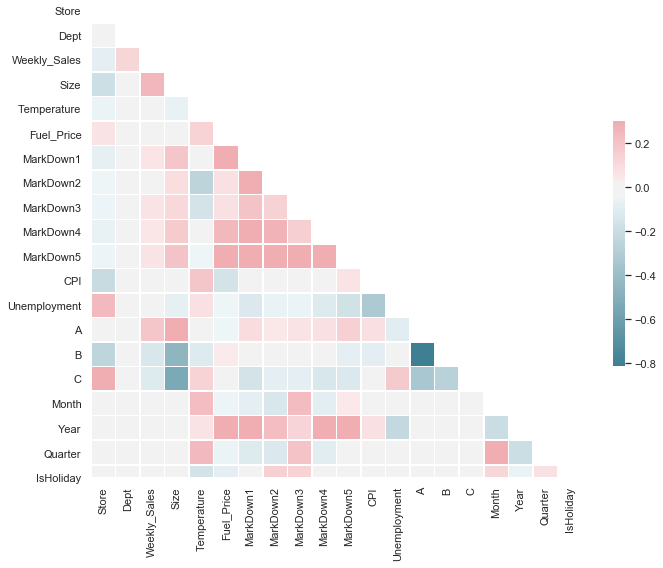

In [61]:
import matplotlib
import seaborn as sns

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [63]:
df.corr()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,A,B,C,Month,Year,Quarter,IsHoliday
Store,1.000000,0.024547,-0.077254,-0.181081,-0.052154,0.062560,-0.068841,-0.033118,-0.039617,-0.064146,-0.040368,-0.205784,0.243623,-0.026997,-0.245708,0.442014,0.001018,0.003006,0.001046,-0.000552
Dept,0.024547,1.000000,0.122809,-0.003716,0.004323,0.003318,0.001130,0.000224,0.001742,0.001857,0.003074,-0.007375,0.009095,0.011772,-0.029742,0.028559,0.000856,0.003514,0.000686,0.000872
Weekly_Sales,-0.077254,0.122809,1.000000,0.257595,0.002229,0.002425,0.057502,0.020900,0.062993,0.053122,0.065682,-0.027217,-0.019810,0.190792,-0.131511,-0.103829,0.026156,-0.010162,0.021825,0.006571
Size,-0.181081,-0.003716,0.257595,1.000000,-0.058098,0.005248,0.194258,0.093225,0.109307,0.166389,0.201655,0.004880,-0.068228,0.763420,-0.453006,-0.533820,-0.001212,-0.004999,-0.001260,0.000600
Temperature,-0.052154,0.004323,0.002229,-0.058098,1.000000,0.138368,-0.014719,-0.248865,-0.157352,-0.021223,-0.037427,0.189123,0.073570,0.022716,-0.106495,0.134495,0.232680,0.067079,0.241810,-0.154005
Fuel_Price,0.062560,0.003318,0.002425,0.005248,0.138368,1.000000,0.364356,0.072518,0.081646,0.251853,0.341488,-0.154353,-0.033980,-0.036081,0.037624,-0.000983,-0.042920,0.784283,-0.044572,-0.075053
MarkDown1,-0.068841,0.001130,0.057502,0.194258,-0.014719,0.364356,1.000000,0.320829,0.203004,0.838304,0.682043,0.015062,-0.114920,0.098451,-0.003045,-0.158367,-0.077296,0.586677,-0.101435,0.005945
MarkDown2,-0.033118,0.000224,0.020900,0.093225,-0.248865,0.072518,0.320829,1.000000,0.141542,0.269927,0.326100,-0.006480,-0.056313,0.046982,-0.001988,-0.074709,-0.133572,0.231178,-0.119004,0.147636
MarkDown3,-0.039617,0.001742,0.062993,0.109307,-0.157352,0.081646,0.203004,0.141542,1.000000,0.153471,0.398999,-0.000794,-0.052250,0.066616,-0.019771,-0.078525,0.235175,0.126934,0.204815,0.137684
MarkDown4,-0.064146,0.001857,0.053122,0.166389,-0.021223,0.251853,0.838304,0.269927,0.153471,1.000000,0.562518,0.005417,-0.100800,0.081495,-0.004064,-0.128597,-0.083680,0.458708,-0.095181,0.029553


<b>Variable Reduction using Recursive Feature Elimination

In [66]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df[df.columns.difference(['Weekly_Sales','ln_Weekly_Sales','Date'])]
linreg = LinearRegression()
rfe = RFE(linreg, 13)
rfe = rfe.fit(X, df[['ln_Weekly_Sales']] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True  True  True  True  True  True False False False False False
  True  True False  True  True  True  True]
[1 1 1 1 1 1 1 5 6 2 7 4 1 1 3 1 1 1 1]


In [67]:
X.columns

Index(['A', 'B', 'C', 'CPI', 'Dept', 'Fuel_Price', 'IsHoliday', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Month', 'Quarter',
       'Size', 'Store', 'Temperature', 'Unemployment', 'Year'],
      dtype='object')

In [68]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, rfe.get_support())]

feature_map

#Alternative of capturing the important variables
RFE_features=X.columns[rfe.get_support()]

selected_features_from_rfe = X[RFE_features]

In [69]:
RFE_features

Index(['A', 'B', 'C', 'CPI', 'Dept', 'Fuel_Price', 'IsHoliday', 'Month',
       'Quarter', 'Store', 'Temperature', 'Unemployment', 'Year'],
      dtype='object')

In [71]:
train_X.shape, train_y.shape, test_X.shape

((421570, 13), (421570, 1), (115064, 13))

<b>1.)Model Building by Random Forest

In [74]:
X_train = df[['A', 'B', 'C', 'CPI','Fuel_Price','Dept' ,'IsHoliday','Month','Quarter','Store', 'Temperature', 'Unemployment','Year']]
y_train= df[['Weekly_Sales']]
X_test= df_test[['A', 'B', 'C', 'CPI','Fuel_Price','Dept','IsHoliday','Month','Quarter', 'Store', 'Temperature', 'Unemployment','Year']]

In [75]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_rf=clf.predict(X_test)
acc_rf= round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 89 % 



<b>2).Model building by Linear Regression

<b>Assumptions Check for Linear Regression

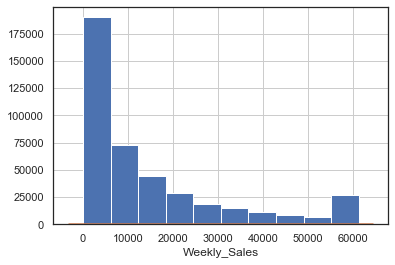

In [77]:
#Normality
df.Weekly_Sales.hist()

# Distribution of variables
import seaborn as sns
sns.distplot(df.Weekly_Sales)

It looks skewed towards left so need to take a log of Dependent variable

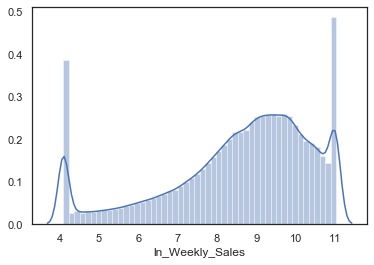

In [78]:
df["ln_Weekly_Sales"]= np.log(df["Weekly_Sales"])

# Distribution of variables
import seaborn as sns
sns.distplot(df.ln_Weekly_Sales)

In [79]:
train_X = df[['A', 'B', 'C', 'CPI','Fuel_Price','Dept' ,'IsHoliday','Month','Quarter','Store', 'Temperature', 'Unemployment','Year']]
train_y= df[['ln_Weekly_Sales']]
test_X= df_test[['A', 'B', 'C', 'CPI','Fuel_Price','Dept','IsHoliday','Month','Quarter', 'Store', 'Temperature', 'Unemployment','Year']]

In [80]:
## Building the model with train set and make predictions on test set
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [81]:
linreg = LinearRegression()
linreg.fit( train_X, train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
linreg.coef_

array([[-1.29719028e+11, -1.29719028e+11, -1.29719028e+11,
        -1.74691718e-03,  9.00182548e-02,  1.56300613e-03,
        -2.62426811e-02,  2.91191985e-02, -4.79209110e-02,
        -1.05344807e-02, -2.56130572e-03,  4.13618413e-03,
        -5.49612526e-02]])

In [83]:
linreg.score(train_X, train_y)

0.077953692188791

In [84]:
acc_linear=round( linreg.score(train_X, train_y) * 100, 2)
acc_linear

7.8

In [85]:
y_pred_t = linreg.predict(train_X)
y_pred_t

array([[8.96086121],
       [8.96086121],
       [8.96086121],
       ...,
       [8.23072815],
       [8.23072815],
       [8.23072815]])

<b>3).Model building by Decision Tree

In [86]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
clf.fit(X_train, y_train)
y_pred_dt= clf.predict(X_test)
acc_dt = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_dt) + ' percent')

89.43 percent


<b>Steps- Building Model by ANN

In [87]:
import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras import optimizers

Using TensorFlow backend.


In [88]:
## Performance measures
from sklearn.metrics import mean_squared_error

In [89]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
from keras.layers import Dense

In [91]:
adam_regularised = Sequential()

In [96]:
# Adding the input layer and the first hidden layer
adam_regularised.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 13))
# Adding the second hidden layer
adam_regularised.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))
# Adding the output layer
adam_regularised.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu'))

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=8, kernel_initializer="uniform")`
  
C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1, kernel_initializer="uniform")`
  


In [97]:
# Compiling Neural Network
adam_regularised.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['accuracy'])

In [99]:
# Fitting our model 
#adam_regularised.fit(X_train, y_train, batch_size = 20, nb_epoch = 20)

<b>Let's compare the accuracy score of all the regression models used above.

In [100]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree'],
    
    'Score': [acc_linear, acc_rf,acc_dt]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,89.43
1,Random Forest,89.14
0,Linear Regression,7.80


In [102]:
# For Output_excel file...
writer=pd.ExcelWriter('Walmart Store Sales Prediction output.xlsx', engine='xlsxwriter')

<b>Predicting Sales value for test data based on highest score model.

In [103]:
# Prediction value using Random Forest model..
submission = pd.DataFrame({
        "Store_Dept_Date": test.Store.astype(str)+'_'+test.Dept.astype(str)+'_'+test.Date.astype(str),
        "Weekly_Sales": y_pred_rf
    })

submission.to_csv('weekly_sales predicted.csv', index=False)
submission.to_excel(writer,'Weekly_sales Pred',index=False)

In [104]:
submission.head(20)

,Store_Dept_Date,Weekly_Sales
0,1_1_2012-11-02,31594.278432
1,1_1_2012-11-09,31594.278432
2,1_1_2012-11-16,31594.278432
3,1_1_2012-11-23,31594.278432
4,1_1_2012-11-30,37064.015557
5,1_1_2012-12-07,5065.176145
6,1_1_2012-12-14,37536.561840
7,1_1_2012-12-21,39632.014950
8,1_1_2012-12-28,36269.170400
9,1_1_2013-01-04,30377.466400
